In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


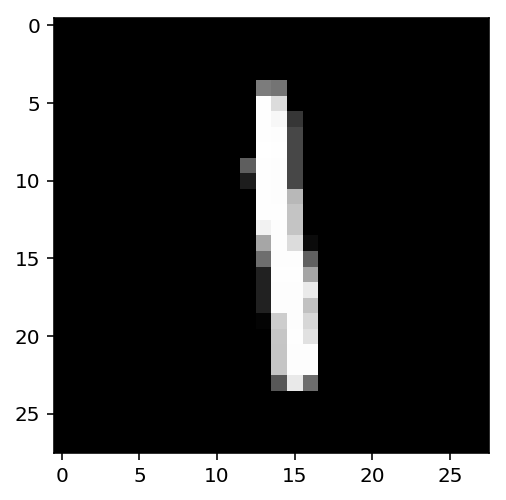

In [4]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');

In [5]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs= images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
w2= torch.randn(256, 10)

b1 = torch.randn(256)
b2= torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)

out = torch.mm(h, w2) + b2


In [6]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [7]:
get = softmax(out)
#print(get.shape)
print(get.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [8]:
from torch import nn

In [9]:
class network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256) #input to hidden layer 
        self.output = nn.Linear(256, 10) #output
        
        self.sigmoid = nn.Sigmoid() #activation
        self.softmax = nn.Softmax(dim=1) #softmax
        
    def forward(self, x):
        x= self.hidden(x)
        x= self.sigmoid(x)
        x= self.output(x)
        x= self.softmax(x)
        
        return x

In [10]:
# class object
model = network()

In [11]:
model

network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

## Relu activation function 

In [12]:
## Solution

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
model = network()
model

network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [14]:
#print(model.hidden1.weight)
#print(model.hidden1.bias)

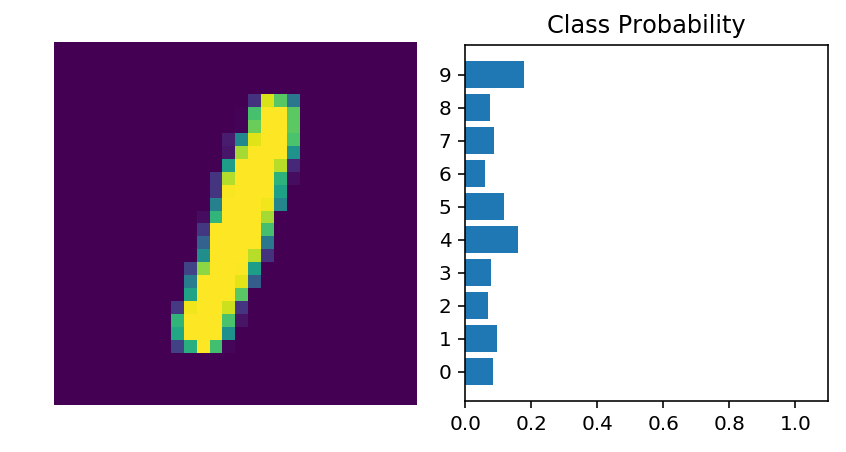

In [41]:
# Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

## Using Sequential

In [43]:
inputs = 784
hidden = [128, 64]
output = 10

model= nn.Sequential(nn.Linear(inputs, hidden[0]), nn.ReLU(),
                     nn.Linear(hidden[0], hidden[1]), nn.ReLU(),
                     nn.Linear(hidden[1], output), nn.Softmax(dim=1)
                    )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


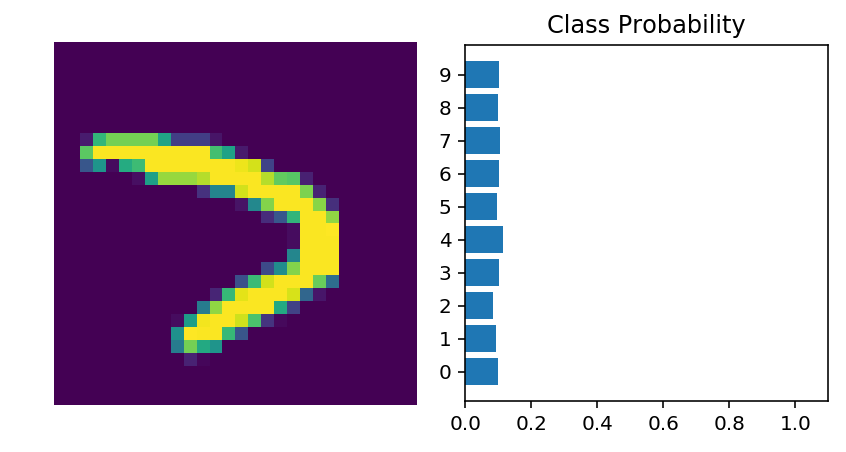

In [52]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28), ps)

In [76]:
print(model[2])
model[2].weight

Linear(in_features=128, out_features=64, bias=True)


Parameter containing:
tensor([[ 0.0695, -0.0432,  0.0023,  ..., -0.0154,  0.0502,  0.0517],
        [-0.0447, -0.0745,  0.0735,  ..., -0.0569,  0.0041,  0.0217],
        [ 0.0803, -0.0061,  0.0206,  ..., -0.0810, -0.0657,  0.0489],
        ...,
        [-0.0770, -0.0041, -0.0872,  ...,  0.0701, -0.0667, -0.0439],
        [ 0.0595, -0.0570, -0.0247,  ...,  0.0392, -0.0180, -0.0732],
        [ 0.0165, -0.0224, -0.0163,  ...,  0.0258, -0.0218, -0.0215]],
       requires_grad=True)